Aperçu des données d'entraînement :


,DIFF,R2,R7,R8,R17,R22,R32
0,0.0,0.705,0.290,0.1334,0.0481,0.5258,0.2941
1,1.0,0.801,0.213,0.1282,0.0186,2.1411,0.3005
2,1.0,0.591,0.429,0.2999,0.0800,0.5957,0.4126
3,0.0,0.373,0.346,1.3704,0.0812,0.3430,0.2265
4,0.0,0.000,1.417,0.2493,0.0501,0.8728,0.1086



Valeurs manquantes :
DIFF    642
R2      642
R7      642
R8      642
R17     642
R22     642
R32     642
dtype: int64

Valeurs manquantes après suppression :
DIFF    0
R2      0
R7      0
R8      0
R17     0
R22     0
R32     0
dtype: int64

Dimensions des données : X = (303, 6), y = (303,)

Matrice de confusion :


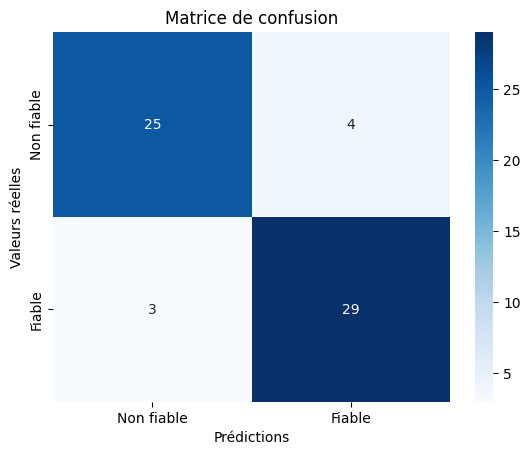


Rapport de classification :
              precision    recall  f1-score   support

  Non fiable       0.89      0.86      0.88        29
      Fiable       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Score d'accuracy :
Accuracy : 0.89

Aperçu des données de test :


,R2,R7,R8,R17,R22,R32
0,0.893,0.201,0.62380,0.0509,0.2269,0.4505
1,0.832,0.418,0.46180,0.0468,1.2473,0.4070
2,0.000,1.291,0.18610,0.0681,0.2749,0.3574
3,0.172,0.989,0.99330,0.0843,1.4420,0.1661
4,0.697,0.794,0.07348,0.0805,0.8281,0.4313



Valeurs manquantes dans les données de test :
R2     0
R7     0
R8     0
R17    0
R22    0
R32    0
dtype: int64

Les prédictions ont été sauvegardées dans le fichier 'submission_farm_test.csv'.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('farms_train.csv', delimiter=';', decimal=',')

print("Aperçu des données d'entraînement :")
display(train_data.head())
print("\nValeurs manquantes :")
print(train_data.isnull().sum())

train_data = train_data.dropna()
print("\nValeurs manquantes après suppression :")
print(train_data.isnull().sum())

# Séparer les variables explicatives (X) et la cible (y)
X = train_data.drop(columns=['DIFF'])  
y = train_data['DIFF']                
print(f"\nDimensions des données : X = {X.shape}, y = {y.shape}")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

# Évaluer le modèle
print("\nMatrice de confusion :")
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non fiable", "Fiable"], yticklabels=["Non fiable", "Fiable"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion")
plt.show()

print("\nRapport de classification :")
print(classification_report(y_val, y_pred, target_names=["Non fiable", "Fiable"]))
print("\nScore d'accuracy :")
print(f"Accuracy : {accuracy_score(y_val, y_pred):.2f}")

farm_test = pd.read_csv('farms_test.csv', delimiter=';', decimal=',')

print("\nAperçu des données de test :")
display(farm_test.head())
print("\nValeurs manquantes dans les données de test :")
print(farm_test.isnull().sum())

# Normaliser les données de test avec le même scaler
farm_test_scaled = scaler.transform(farm_test)
# Faire des prédictions sur les données de test
farm_test_predictions = log_reg.predict(farm_test_scaled)
farm_test['DIFF_Predicted'] = farm_test_predictions
farm_test[['DIFF_Predicted']].to_csv('submission_farm_test.csv', index=False)

print("\nLes prédictions sont dans le fichier 'submission_farm_test.csv'.")

# Par défaut, les algorithmes classent en fonction d'un seuil de probabilité de 0.5. Pour minimiser les faux positifs, il faut augmenter ce seuil.

